In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF


In [2]:
tf=pd.read_csv('tf_mini.csv')
ts=pd.read_csv('log_mini.csv')
tf['mode'] = tf['mode'].replace({
    'major': 1,
    'minor': 0
})

# define user behavior
ts['user_behavior'] = ts['skip_2']*1
ts['user_behavior'] = ts['user_behavior'].replace([1,0],[0,1])

# Track features EDA

In [3]:
# number of features
# number of tracks
print('number of features',len(tf.columns)-1)
print('number of tracks',len(tf))
tf.head(5)

number of features 29
number of tracks 50704


,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


overall mean [ 2.22267980e+02  2.01032475e+03  9.94551314e+01  2.50335970e-01
  4.92074568e-01  5.14525966e-01  6.11742380e-01  8.21595027e+00
  6.41439620e-01  9.96548011e-01  7.05867078e-02  5.26911092e+00
  2.05520038e-01 -7.51931560e+00  5.47602601e-01  6.42059798e-01
  3.91874265e-01  1.22997815e-01  1.21576396e+02  3.91316267e+00
  4.87804231e-01 -3.32294822e-01  2.02192738e-01  1.53935369e-01
 -4.05256541e-02 -2.72469883e-02  4.94752133e-02 -1.97758097e-01
  5.15293206e-03]
overall std [7.22241268e+01 1.14717527e+01 1.13921063e+00 2.76044427e-01
 1.58100749e-01 1.82592881e-01 1.66144220e-01 2.41060180e+00
 2.07954785e-01 4.56108535e-02 2.14223999e-01 3.59754248e+00
 1.76484333e-01 3.92781903e+00 2.23800337e-01 4.79394424e-01
 2.07113668e-01 1.36020425e-01 2.97864469e+01 4.10031575e-01
 2.46373777e-01 4.16315459e-01 2.54021138e-01 2.12657445e-01
 3.33125265e-01 3.77452946e-01 1.44203787e-01 3.49836117e-01
 3.24256135e-01]
standard mean [ 5.26909255e-17  2.82288831e-15  1.23122998

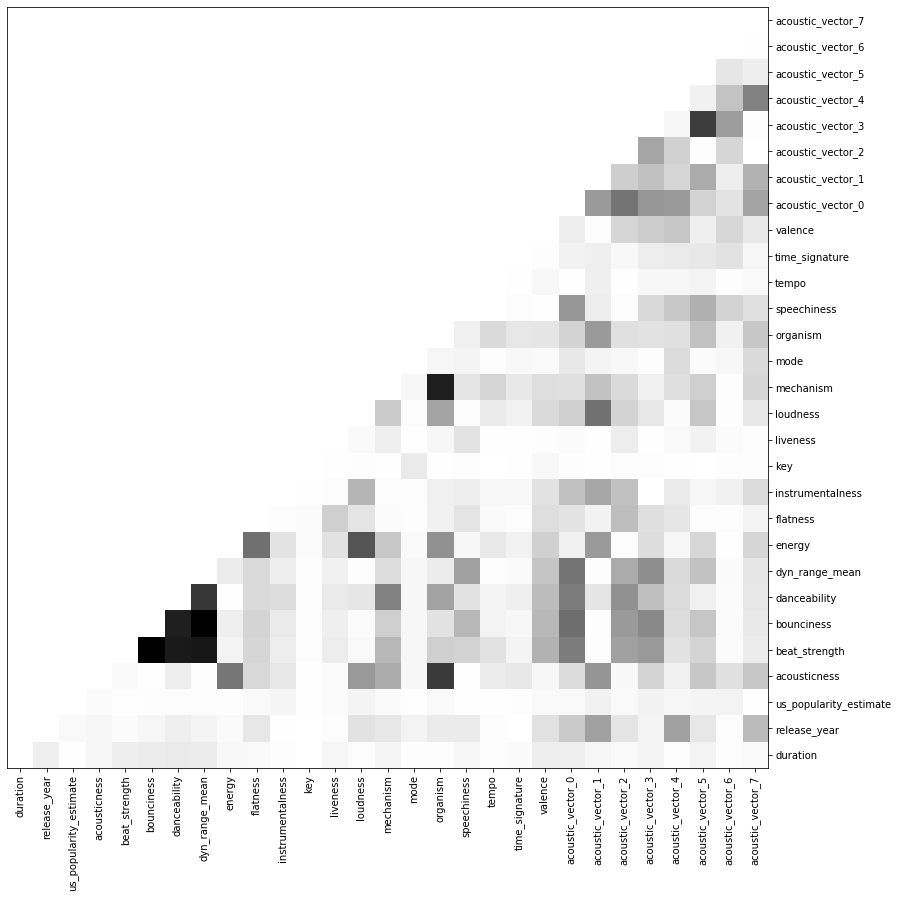

In [4]:
features=[column for column in tf.columns if not column in ['track_id']]

track_data = np.asarray(tf.loc[:,features])

print('overall mean',np.mean(track_data,axis=0))
print('overall std',np.std(track_data,axis=0))

data = track_data - np.mean(track_data,axis=0)
data /=np.std(data,axis=0)

# standard the data
print('standard mean', np.mean(data,axis=0))
print('standard std', np.std(data,axis=0))


# plot covariance matrix

cov_matrix=np.cov(data, rowvar=False)
print(np.sort(cov_matrix.flatten()))

cov_matrix1=cov_matrix
for i in range(len(cov_matrix1)):
    for j in range(i+1):
        cov_matrix1[i,j]=0       
cov_matrix1=np.abs(cov_matrix1)


_=plt.figure(figsize=(14,14))
_=plt.imshow(cov_matrix1, cmap='Greys')
_=plt.xticks(range(len(features)),features,rotation=90)
_=plt.yticks(range(len(features)),features)
plt.gca().invert_yaxis()
plt.gca().yaxis.tick_right()

## Clustering the tracks

(5000, 29)
(5000, 2)


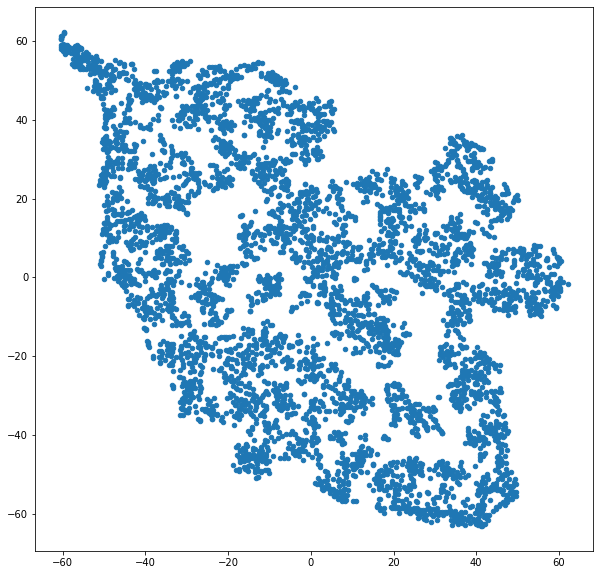

In [5]:

# select 500 samples from all datasets
track_samples = track_data[np.random.choice(np.arange(len(track_data)),5000,replace=False)]


# using T-sen to reduce the dimensions to 2d
track_2d = TSNE(n_components=2, perplexity=50, learning_rate=1000).fit_transform(track_samples)

print(track_samples.shape)
print(track_2d.shape)

# virualize the 2d-track data
_=plt.figure(figsize=(10,10))
_=plt.scatter(track_2d[:,0],track_2d[:,1],s=20)


In [6]:
# clusteing the data into 10 clusters

from sklearn.cluster import KMeans

# create kmeans object in to 4 clusters
kmeans = KMeans(n_clusters=10)


# fit kmeans object to dimension-reduced data
kmeans.fit(track_2d)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(track_2d)
print(y_km)

[[ -2.1128576   9.414544 ]
 [ -2.969512  -41.056828 ]
 [ 44.35803    -6.7269063]
 [-39.89316    15.004167 ]
 [ 33.55751   -47.13963  ]
 [-45.311134   47.361893 ]
 [ 10.102368  -17.220179 ]
 [-12.577302   39.2035   ]
 [ 30.878899   17.686127 ]
 [-25.630322  -16.587278 ]]
[8 3 1 ... 0 8 9]


Text(0, 0.5, 'component 2')

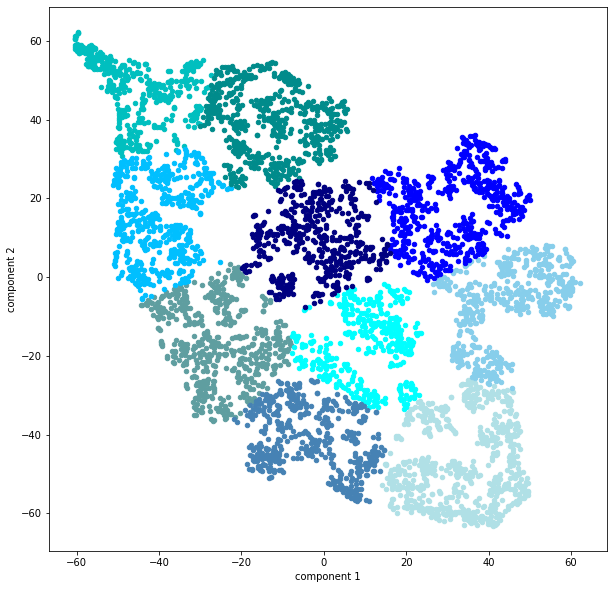

In [7]:
_=plt.figure(figsize=(10,10))
plt.scatter(track_2d[y_km ==0,0], track_2d[y_km == 0,1], s=20, c='c')
plt.scatter(track_2d[y_km ==1,0], track_2d[y_km == 1,1], s=20, c='powderblue')
plt.scatter(track_2d[y_km ==2,0], track_2d[y_km == 2,1], s=20, c='cadetblue')
plt.scatter(track_2d[y_km ==3,0], track_2d[y_km == 3,1], s=20, c='cyan')
plt.scatter(track_2d[y_km ==4,0], track_2d[y_km == 4,1], s=20, c='deepskyblue')
plt.scatter(track_2d[y_km ==5,0], track_2d[y_km == 5,1], s=20, c='skyblue')
plt.scatter(track_2d[y_km ==6,0], track_2d[y_km == 6,1], s=20, c='steelblue')
plt.scatter(track_2d[y_km ==7,0], track_2d[y_km == 7,1], s=20, c='darkcyan')
plt.scatter(track_2d[y_km ==8,0], track_2d[y_km == 8,1], s=20, c='b')
plt.scatter(track_2d[y_km ==9,0], track_2d[y_km == 9,1], s=20, c='navy')
plt.xlabel('component 1')
plt.ylabel('component 2')

Text(0, 0.5, 'distribution')

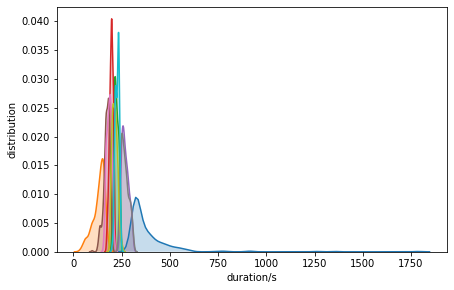

In [8]:
# duaration plot regarding to clusters
_=plt.figure(figsize=(7,4.5))
for i in range(10):
    sns.kdeplot(track_samples[y_km==i][:,0], shade=True)
plt.xlabel('duration/s')
plt.ylabel('distribution')

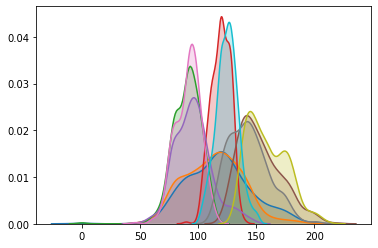

In [9]:
# tempo plot regarding to clusters
for i in range(10):
    sns.kdeplot(track_samples[y_km==i][:,18], shade=True) 
    

# Listening sessions and User actions

In [11]:
ts.head(5)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,user_behavior
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1


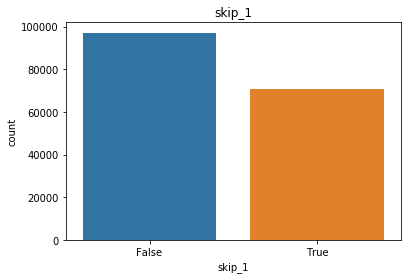

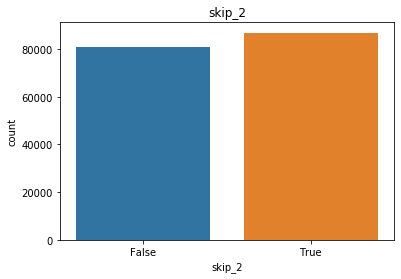

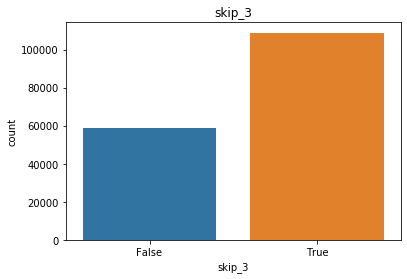

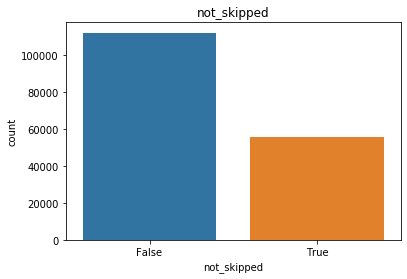

In [12]:
# distribution of skip information

import seaborn as sns
for column in ts.columns:
    if column in ['skip_1','skip_2','skip_3','not_skipped']:
        plt.figure()
        plt.title(column)
        sns.countplot(ts[column])
        plt.title(column)
        plt.show()
        

probability of skip 1 and no skip 0.7543840838694306


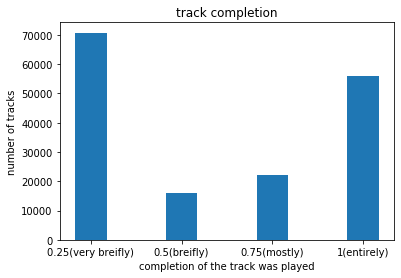

In [13]:
c1 = np.sum(ts['skip_1']==True) #1
aa = ts[ts['skip_1']==False]
c2 = np.sum(aa['skip_2']==True) #2
bb = aa[aa['skip_2']==False]
c3 = np.sum(bb['skip_3']==True) #3
c4 =np.sum(ts['not_skipped']==True)
print('probability of skip 1 and no skip',(c1+c4)/len(ts))
num_tracks = (c1,c2,c3,c4)
ind = np.arange(4) 
plt.bar(ind, num_tracks, width=0.35)
plt.ylabel('number of tracks')
plt.xlabel('completion of the track was played')
plt.title('track completion')
plt.xticks(ind, ('0.25(very breifly)', '0.5(breifly)', '0.75(mostly)', '1(entirely)'))

plt.show()

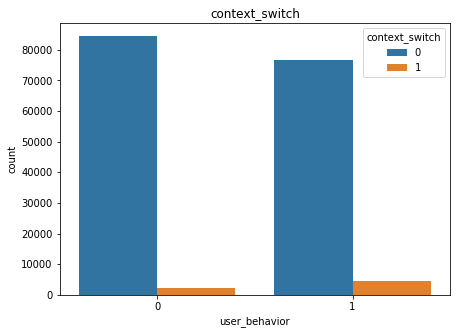

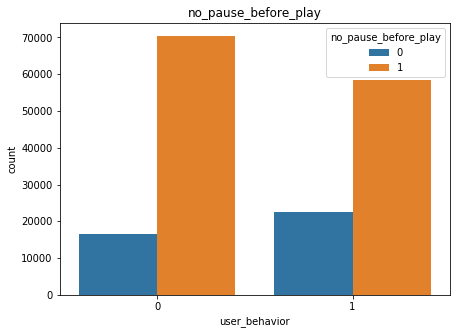

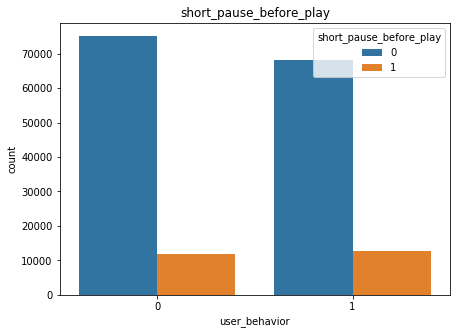

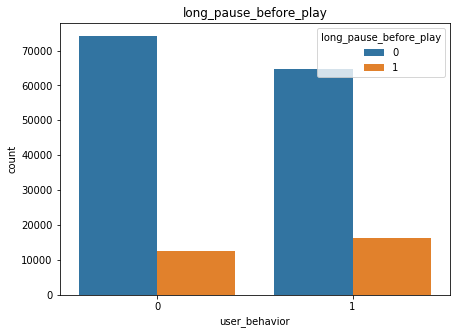

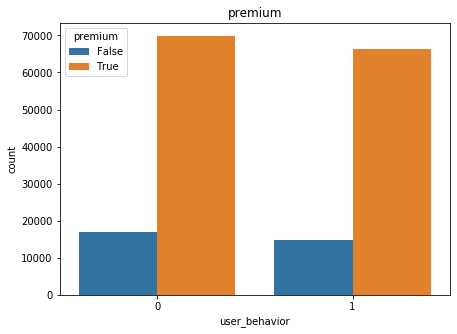

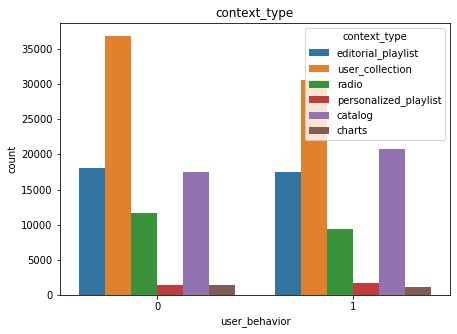

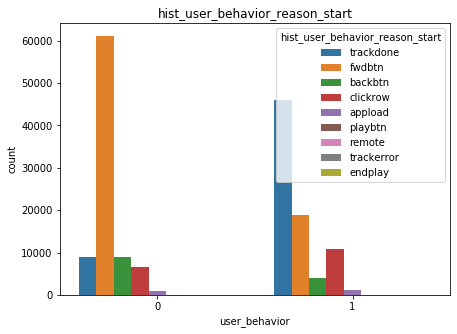

In [14]:
# impact of user actions to user behavior

for column in ts.columns:
    if column in ['context_switch','no_pause_before_play','short_pause_before_play','long_pause_before_play',
                 'premium','context_type','hist_user_behavior_reason_start']:
        _=plt.figure(figsize=(7,5))
        sns.countplot(x='user_behavior', hue=column, data=ts)
        plt.title(column)
        


167880
10000
16.788


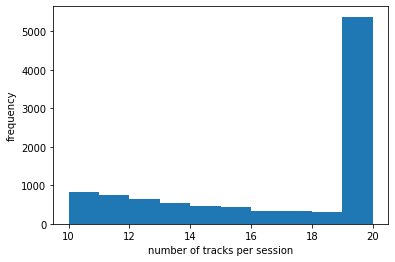

In [15]:
# number of tracks shown to each user

plt.hist(ts.session_id.value_counts())
plt.xlabel("number of tracks per session")
plt.ylabel('frequency')
print(np.bincount(ts.session_id.value_counts())@np.arange(21))
print(np.sum(np.bincount(ts.session_id.value_counts())))
track_number = ts.session_id.value_counts()
print(np.mean(track_number))

In [16]:
# track id dictionary

track_id_dict={}
for i,track_id in enumerate(tf.track_id):
    track_id_dict[track_id]=i
    
for i,track_id in enumerate(ts.track_id_clean):
    if i%10000==0:
        print(i)
    try:
        track_id_dict[track_id]
    except:
        print('error no.',i)

# session id dictionary
session_id_dict={}
i=0
for session_id in ts.session_id:
    try:
        session_id_dict[session_id]
    except:
        session_id_dict[session_id]=i
        i+=1
print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
10000


In [17]:
# combine two datasets
user_id_index = [session_id_dict[j] for j in ts.session_id]
track_id_index = [track_id_dict[j] for j in ts.track_id_clean]
ts['user_id_index'] = user_id_index
ts['track_id_index'] = track_id_index
ts = ts.rename(columns = {'track_id_clean':'track_id'})
historical_data = ts[['user_id_index','track_id_index','user_behavior','track_id','session_position','session_id']]
full_data = pd.merge(historical_data,tf)

In [18]:
# an interaction matrix
# 1 denote the user interacted with the track before
# 0 denote the user did not interact with the track before

int_matrix = np.zeros([len(session_id_dict.keys()),len(track_id_dict.keys())])
for line in historical_data.itertuples():
    if line[3] ==0:
        int_matrix[line[1], line[2]] = 1
    elif line[3] ==1:
        int_matrix[line[1], line[2]] = 1

Text(0.5, 1.0, 'tracks distribution')

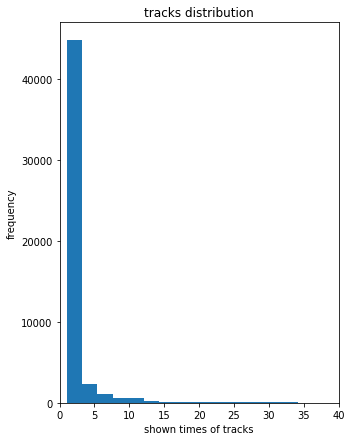

In [19]:
# number of times that a track has been shown

_=plt.figure(figsize=(5,7))
plt.hist(np.sum(int_matrix,axis=0),bins=500)
plt.xlim((0,40))
plt.xlabel('shown times of tracks')
plt.ylabel('frequency')
plt.title('tracks distribution')


In [23]:
# observation matrix with 
# 1 denote skip2 = False
# 0 denote skip2 = True

observed_matrix = np.full([len(session_id_dict.keys()),len(track_id_dict.keys())],np.nan)
for line in historical_data.itertuples():
    if line[3] ==0:
        observed_matrix[line[1], line[2]] = 0
    elif line[3] ==1:
        observed_matrix[line[1], line[2]] = 1


(0, 20)

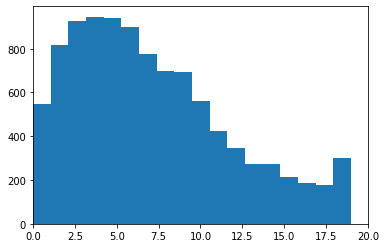

In [25]:
# number of track has been skipped by user
plt.hist(np.nansum(observed_matrix,axis=1),bins=18)
plt.xlim((0,20))

/Users/ruixue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


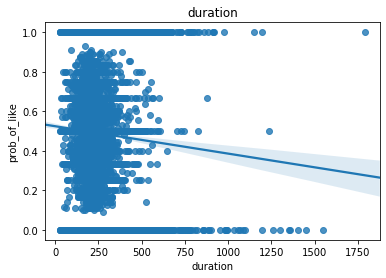

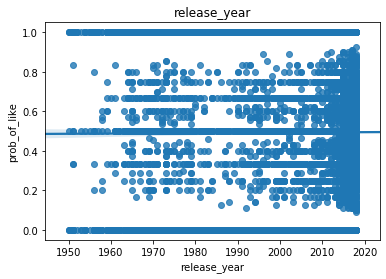

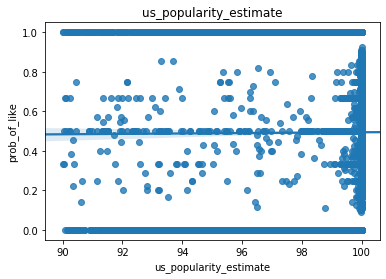

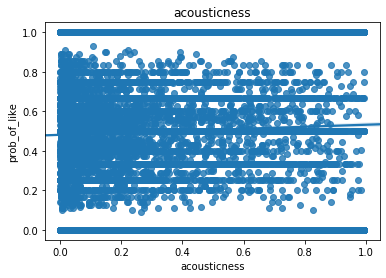

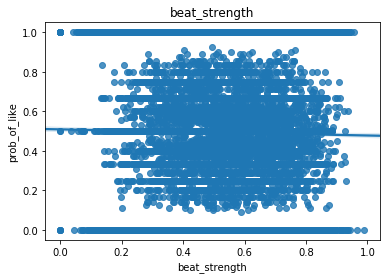

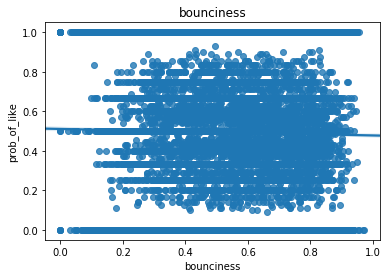

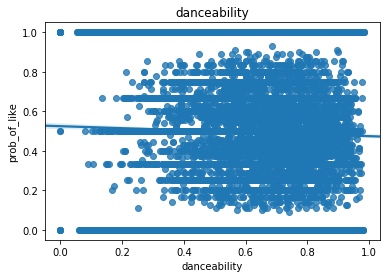

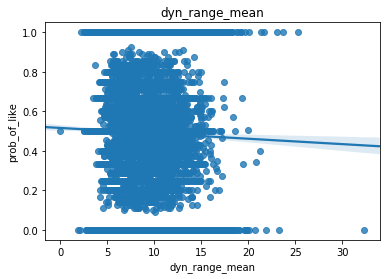

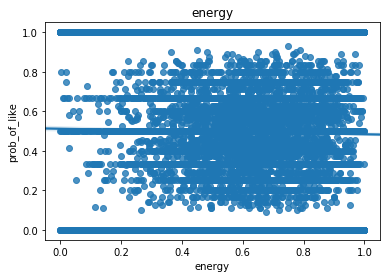

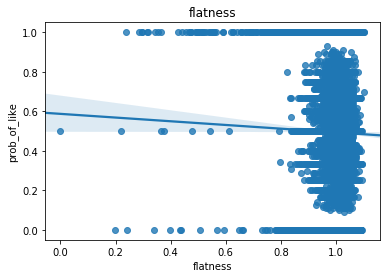

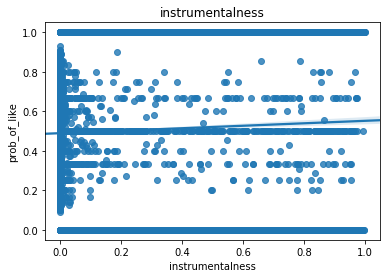

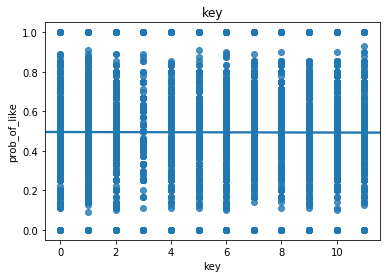

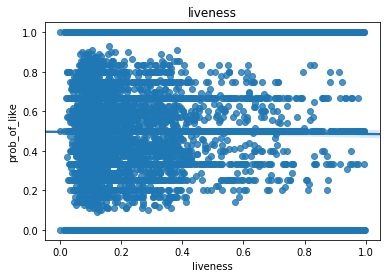

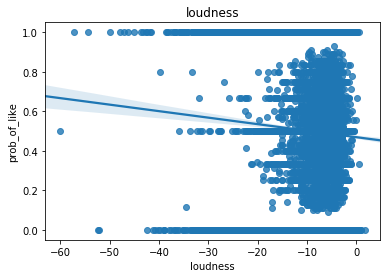

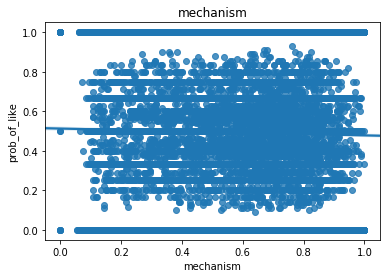

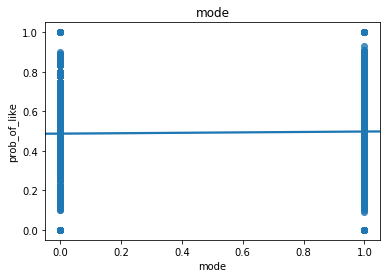

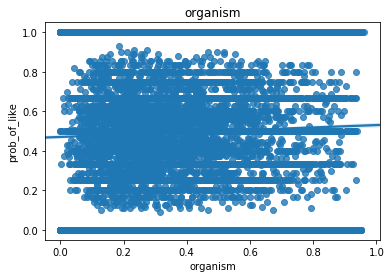

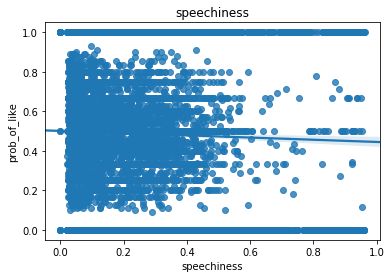

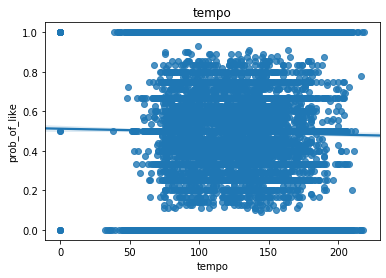

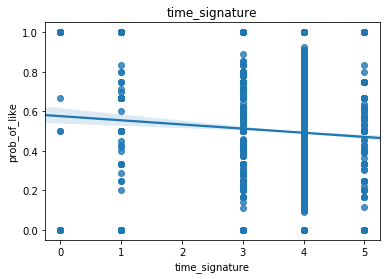

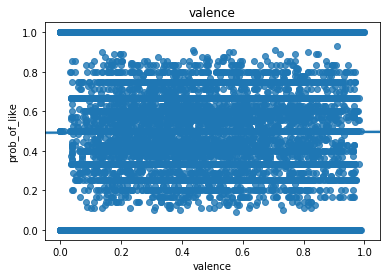

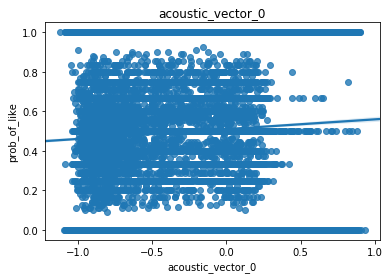

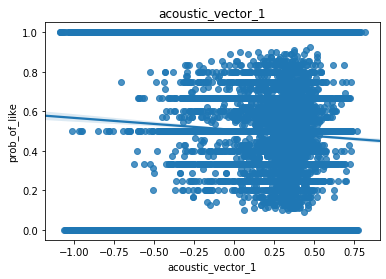

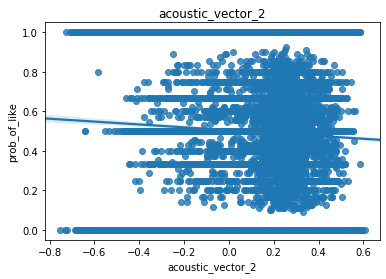

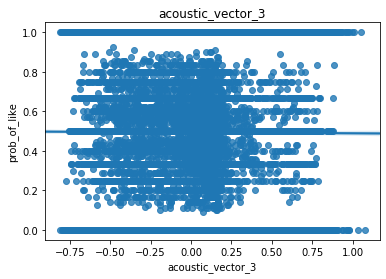

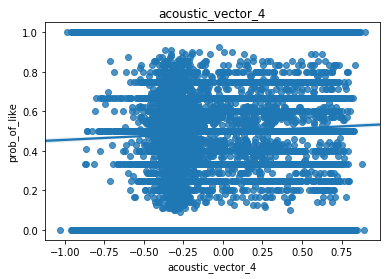

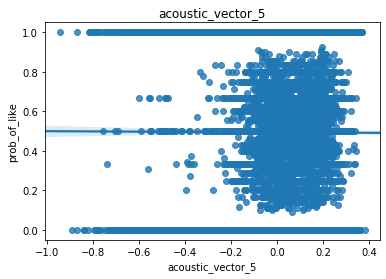

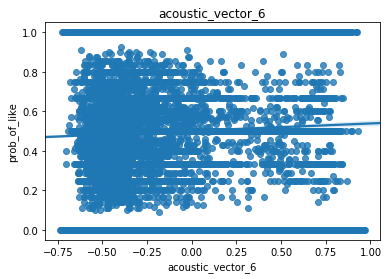

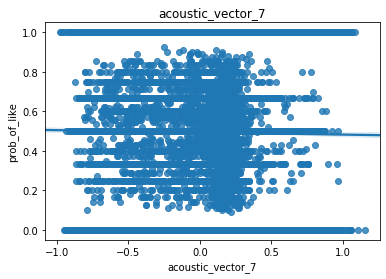

In [29]:
# regression plot of track features

tf['pos'] = (observed_matrix == 1).astype(int).sum(axis=0)
tf['neg'] = (observed_matrix == 0).astype(int).sum(axis=0)
tf['shown'] = tf['pos'] + tf['neg']
tf['prob_of_like'] = tf.pos/tf.shown
for column in tf.columns:
    if not column in ['track_id','pos','neg','shown','prob_of_like']:
        plt.figure()
        sns.regplot(x=column, y='prob_of_like', data=tf)
        plt.title(column)
       

/Users/ruixue/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


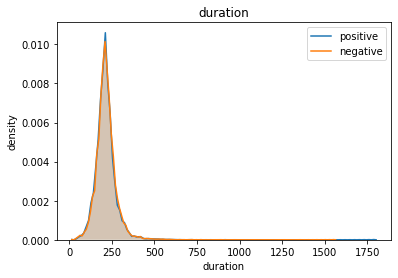

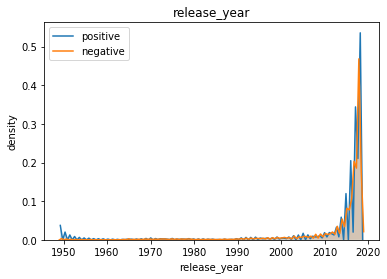

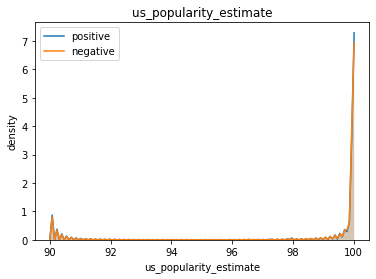

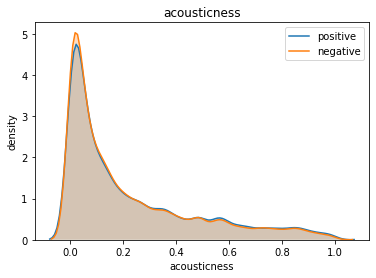

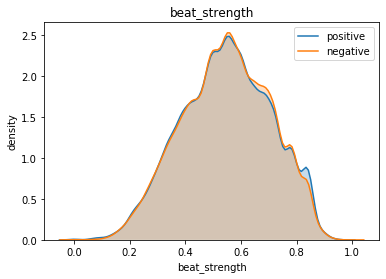

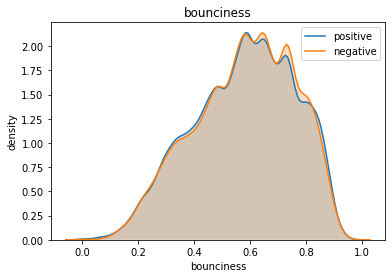

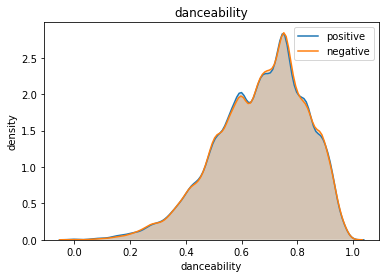

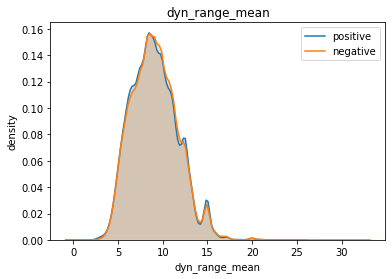

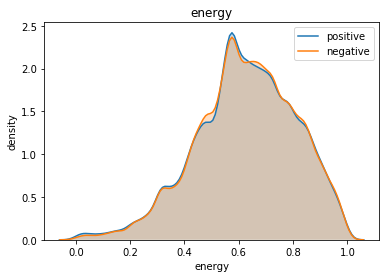

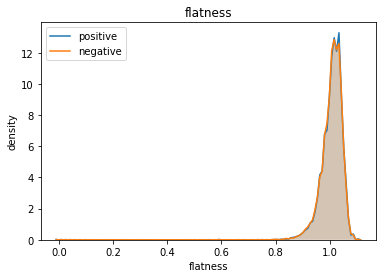

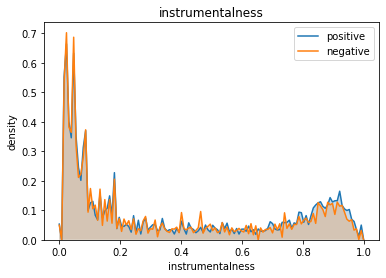

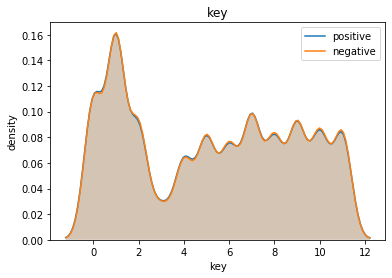

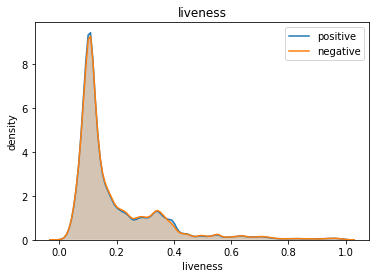

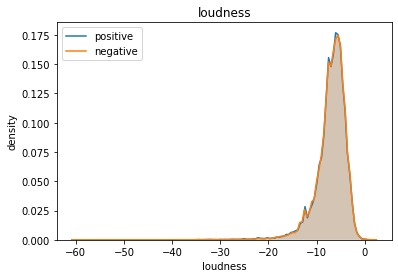

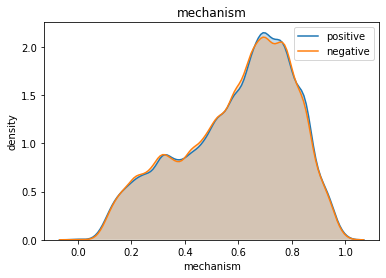

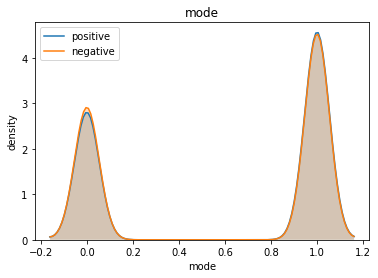

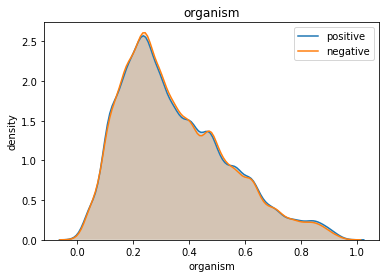

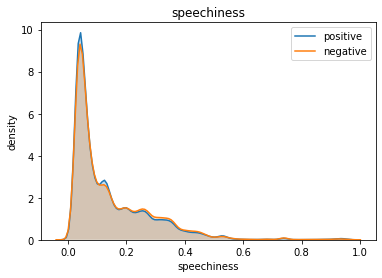

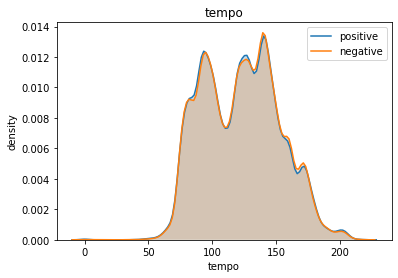

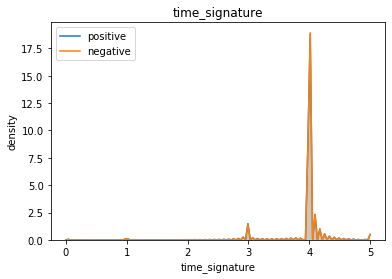

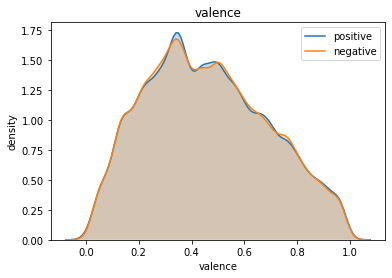

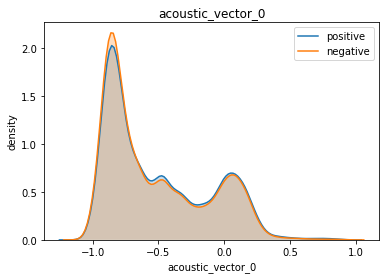

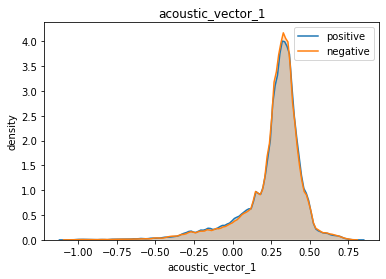

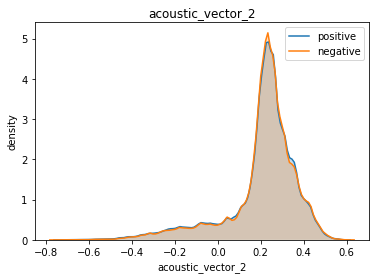

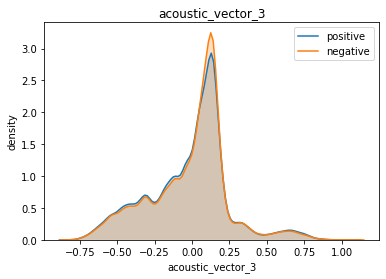

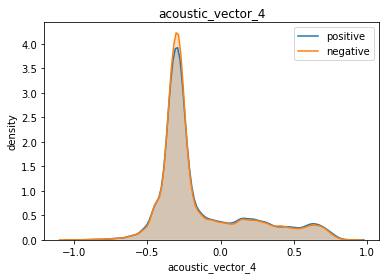

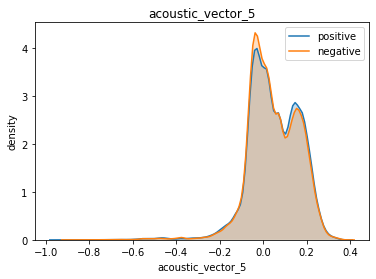

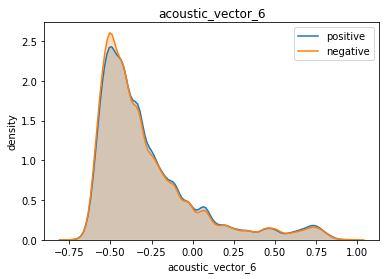

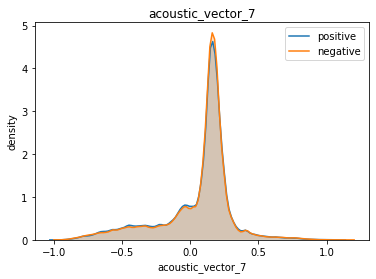

In [28]:
# effects of track features to user behavior

for column in full_data.columns:
    if not column in ['user_id_index','track_id_index','user_behavior','track_id',
                      'session_position','session_id']:
        
        plt.figure()
        x = full_data[full_data['user_behavior'] == 1 ][column]
        y = full_data[full_data['user_behavior'] == 0 ][column]
        sns.kdeplot(x, shade=True)
        sns.kdeplot(y, shade=True)
        
        plt.legend(labels=['positive', 'negative'])
        plt.xlabel(column)
        plt.ylabel('density')
     
        plt.title(column)


